In [1]:
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
# Reading the data
df=pd.read_csv("C:/Users/doppa/OneDrive/Documents/Desktop/80_cereal/80_cereal/cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [5]:
(df==-1).sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
df=df.replace(-1,np.NaN)

In [7]:
for column in ['carbo','sugars','potass']:
    df[column]=df[column].fillna(df[column].mean())

In [8]:
(df==-1).sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [9]:
{column:list(df[column].unique()) for column in ['mfr','type']}

{'mfr': ['N', 'Q', 'K', 'R', 'G', 'P', 'A'], 'type': ['C', 'H']}

In [10]:
df['type']=df['type'].replace({'C':0,'H':1})

In [11]:
df['type'].unique()

array([0, 1], dtype=int64)

In [12]:
dummies=pd.get_dummies(df['mfr'])

In [13]:
df=pd.concat([df,dummies],axis=1)

In [14]:
df=df.drop('mfr',axis=1)

In [15]:
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,A,G,K,N,P,Q,R
0,100% Bran,0,70,4,1,130,10.0,5.0,6.0,280.000000,...,1.0,0.33,68.402973,False,False,False,True,False,False,False
1,100% Natural Bran,0,120,3,5,15,2.0,8.0,8.0,135.000000,...,1.0,1.00,33.983679,False,False,False,False,False,True,False
2,All-Bran,0,70,4,1,260,9.0,7.0,5.0,320.000000,...,1.0,0.33,59.425505,False,False,True,False,False,False,False
3,All-Bran with Extra Fiber,0,50,4,0,140,14.0,8.0,0.0,330.000000,...,1.0,0.50,93.704912,False,False,True,False,False,False,False
4,Almond Delight,0,110,2,2,200,1.0,14.0,8.0,98.666667,...,1.0,0.75,34.384843,False,False,False,False,False,False,True


In [16]:
for column in df.columns[-7:]:
    df[column]=df[column].astype(int)

In [17]:
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,A,G,K,N,P,Q,R
0,100% Bran,0,70,4,1,130,10.0,5.0,6.0,280.000000,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,100% Natural Bran,0,120,3,5,15,2.0,8.0,8.0,135.000000,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,All-Bran,0,70,4,1,260,9.0,7.0,5.0,320.000000,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,All-Bran with Extra Fiber,0,50,4,0,140,14.0,8.0,0.0,330.000000,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,Almond Delight,0,110,2,2,200,1.0,14.0,8.0,98.666667,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


In [18]:
#Split and Scaling the dataset
y=df.loc[:,'rating']
x=df.drop('rating',axis=1)

In [19]:
x=x.drop('name',axis=1)
x

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,A,G,K,N,P,Q,R
0,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,0,0,0,1,0,0,0
1,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,0,0,0,0,0,1,0
2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,0,0,1,0,0,0,0
3,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,0,0,1,0,0,0,0
4,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,0,1,0,0,0,0,0
73,0,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,0,1,0,0,0,0,0
74,0,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,0,0,0,0,0,0,1
75,0,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,0,1,0,0,0,0,0


In [20]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [21]:
#Splitting between train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(53, 20)
(24, 20)
(53,)
(24,)


In [23]:
model=LinearRegression()
model_lr=Ridge(alpha=1.0)
model_lasso=Lasso(alpha=1.0)

In [24]:
for model in [model,model_lr,model_lasso]:
    model.fit(x_train,y_train)
    print(model,model.score(x_test,y_test))

LinearRegression() 0.9616084101829709
Ridge() 0.9810135102170319
Lasso() 0.9514558953126743


In [25]:
x_train.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,A,G,K,N,P,Q,R
53,-0.201347,-0.355585,0.417912,-1.013072,1.924986,-0.486498,1.347779,-0.931712,-0.777492,3.23257,0.957813,-0.198067,0.774053,-0.114708,-0.632456,1.532262,-0.290701,-0.363803,-0.340503,-0.340503
47,-0.201347,-0.355585,-0.501495,-0.012988,0.724306,-0.064172,0.051181,-0.237495,-0.125558,-0.14627,-1.460273,-0.198067,0.774053,-0.114708,1.581139,-0.652630,-0.290701,-0.363803,-0.340503,-0.340503
19,-0.201347,0.161019,0.417912,1.987181,-0.236238,0.780481,-1.245416,-0.006090,0.888562,-0.14627,0.957813,-0.198067,-1.388576,-0.114708,-0.632456,1.532262,-0.290701,-0.363803,-0.340503,-0.340503
76,-0.201347,0.161019,-0.501495,-0.012988,0.484170,-0.486498,0.310501,0.225316,-0.560180,-0.14627,-1.460273,-0.198067,-0.307262,-0.114708,1.581139,-0.652630,-0.290701,-0.363803,-0.340503,-0.340503
67,-0.201347,0.161019,3.176134,-1.013072,0.844374,-0.486498,0.310501,-0.931712,-0.632618,-0.14627,-1.460273,-0.198067,0.774053,-0.114708,-0.632456,1.532262,-0.290701,-0.363803,-0.340503,-0.340503


## Data visualization

In [26]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [27]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [28]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [29]:
df.head()

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,weight,cups,rating,A,G,K,N,P,Q,R
0,100% Bran,0,70,4,1,130,10.0,5.0,6.0,280.000000,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,100% Natural Bran,0,120,3,5,15,2.0,8.0,8.0,135.000000,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,All-Bran,0,70,4,1,260,9.0,7.0,5.0,320.000000,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,All-Bran with Extra Fiber,0,50,4,0,140,14.0,8.0,0.0,330.000000,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,Almond Delight,0,110,2,2,200,1.0,14.0,8.0,98.666667,...,1.0,0.75,34.384843,0,0,0,0,0,0,1


<Axes: title={'center': 'Overall Cereals Data Distribution'}, ylabel='Count'>

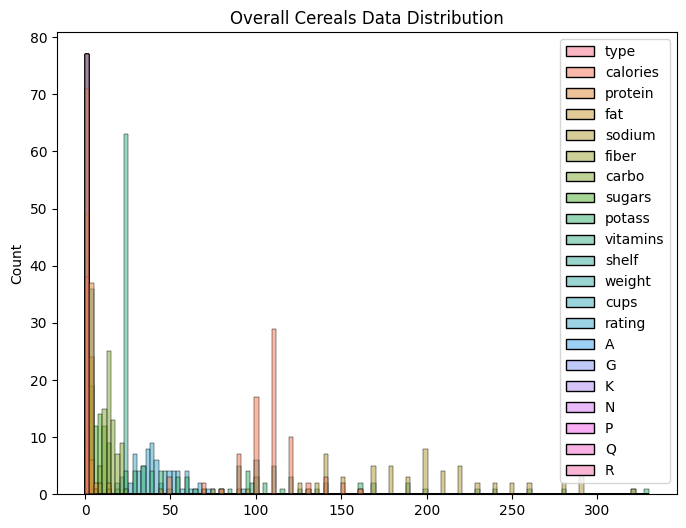

In [30]:
#Lets see the overall distribution of our data

plt.figure(figsize=(8,6))
plt.title("Overall Cereals Data Distribution")
sns.histplot(data = df)

In [31]:
# Let's create a function so that we don't need to retype everything each plot
def plot_histogram(column_data, column_name):
    plt.figure(figsize=(5, 3))
    plt.title(f"Distribution of {column_name}")
    sns.histplot(column_data, kde=True) 
    plt.show()

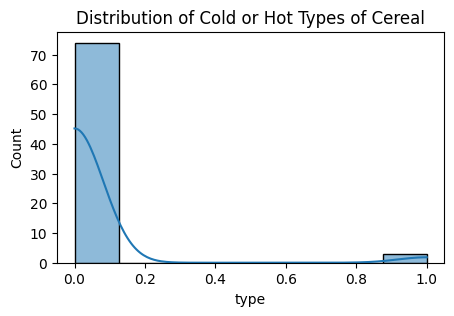

In [32]:
plot_histogram(df['type'], 'Cold or Hot Types of Cereal')

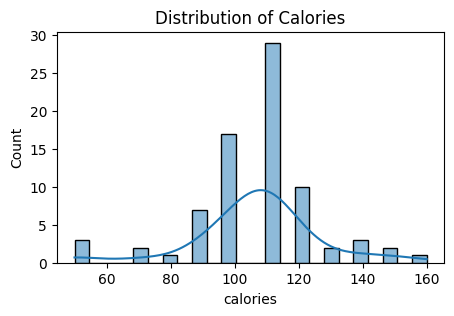

In [33]:
plot_histogram(df['calories'], 'Calories')

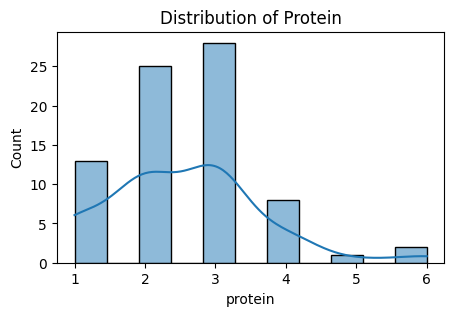

In [34]:
plot_histogram(df['protein'], 'Protein')

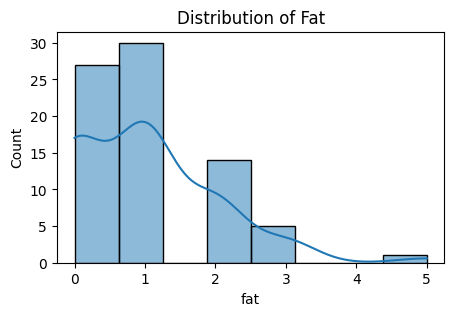

In [35]:
plot_histogram(df['fat'], 'Fat')

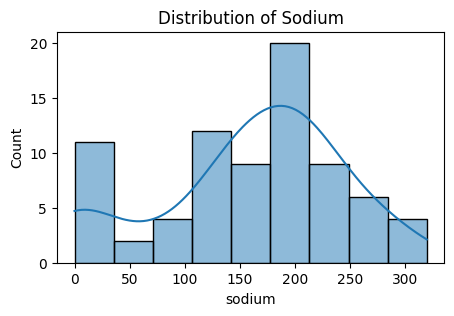

In [36]:
plot_histogram(df['sodium'], 'Sodium')

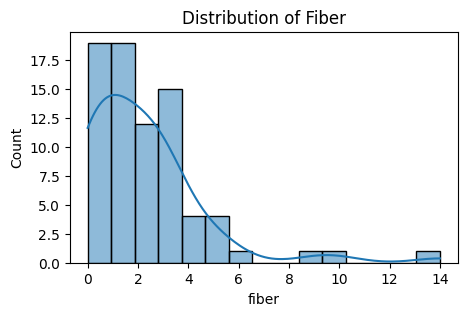

In [37]:
plot_histogram(df['fiber'], 'Fiber')

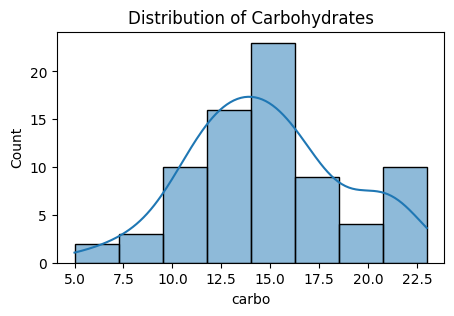

In [38]:
plot_histogram(df['carbo'], 'Carbohydrates')

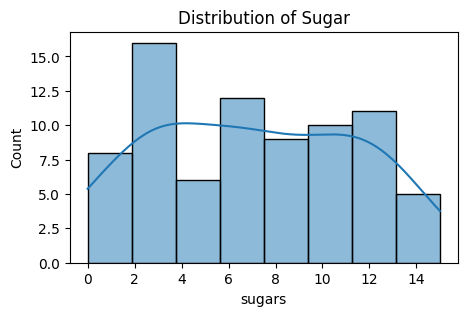

In [39]:
plot_histogram(df['sugars'], 'Sugar')

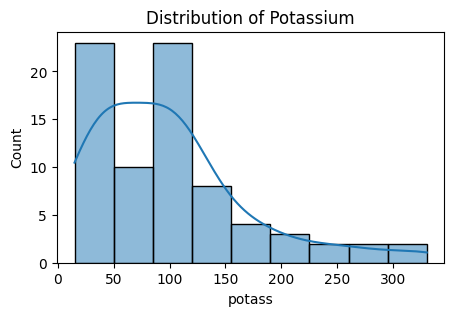

In [40]:
plot_histogram(df['potass'], 'Potassium')

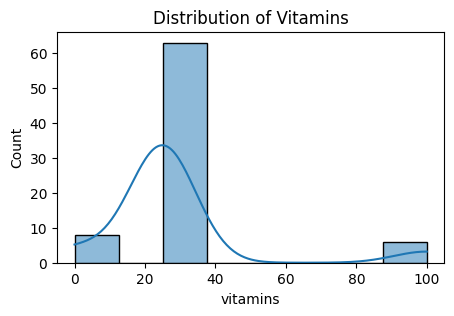

In [41]:
plot_histogram(df['vitamins'], 'Vitamins')

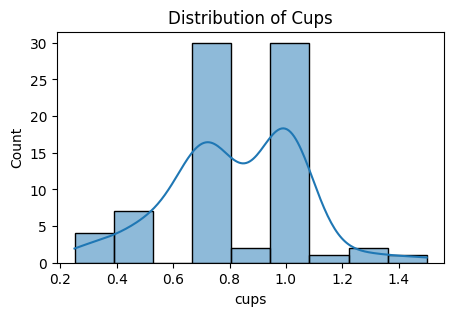

In [42]:
plot_histogram(df['cups'], 'Cups')

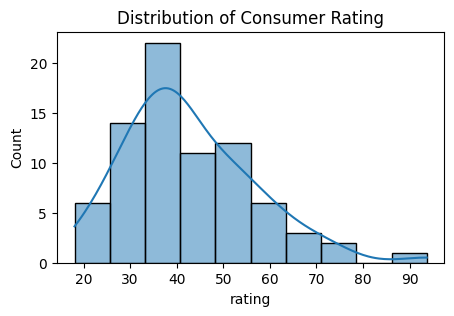

In [43]:
plot_histogram(df['rating'], 'Consumer Rating')

<Axes: title={'center': 'Brands and Their Ratings'}, xlabel='name', ylabel='rating'>

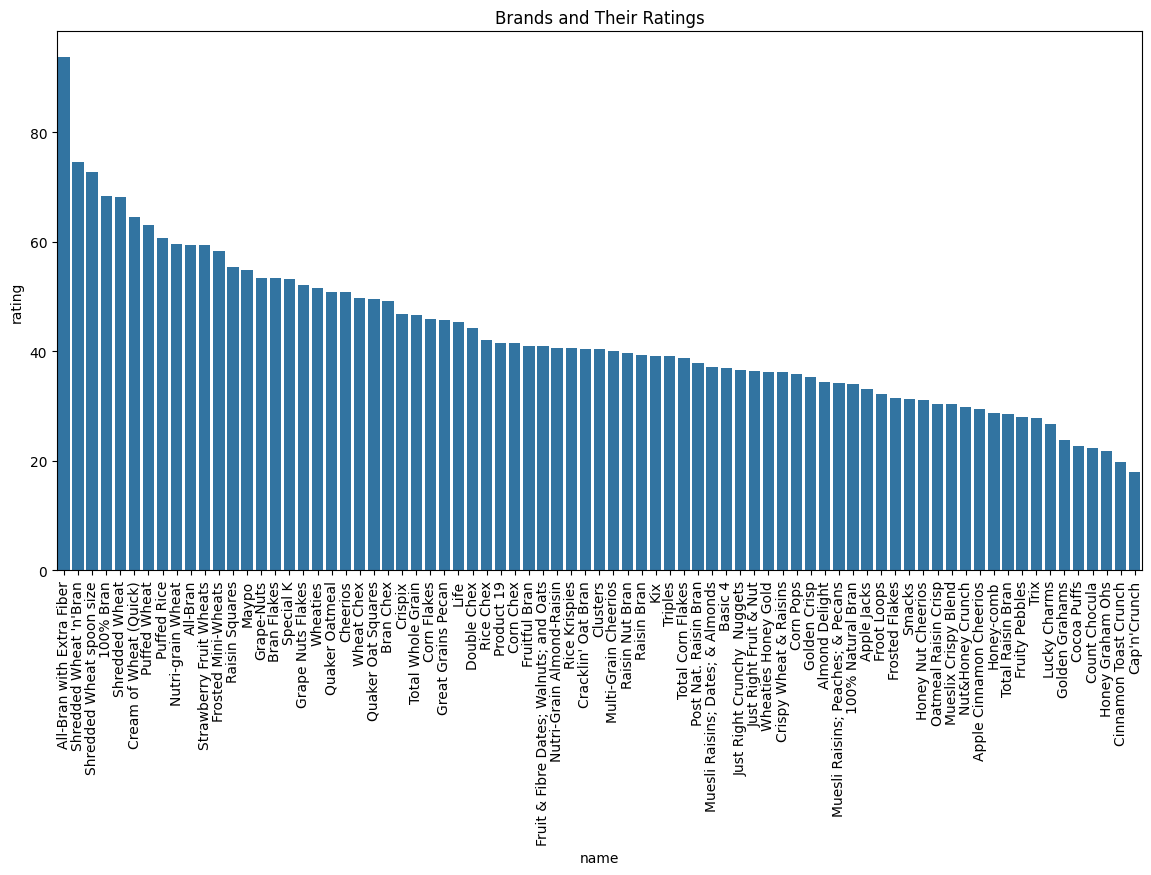

In [44]:
# Sort the DataFrame by rating in descending order
cereals_sorted = df.sort_values(by='rating', ascending=False)

plt.figure(figsize=(14, 7))
plt.title("Brands and Their Ratings")
plt.xticks(rotation=90)
sns.barplot(data=cereals_sorted, x=cereals_sorted['name'], y=cereals_sorted['rating'])

<Axes: title={'center': 'Relationship between Sugar Content and Rating'}, xlabel='sugars', ylabel='rating'>

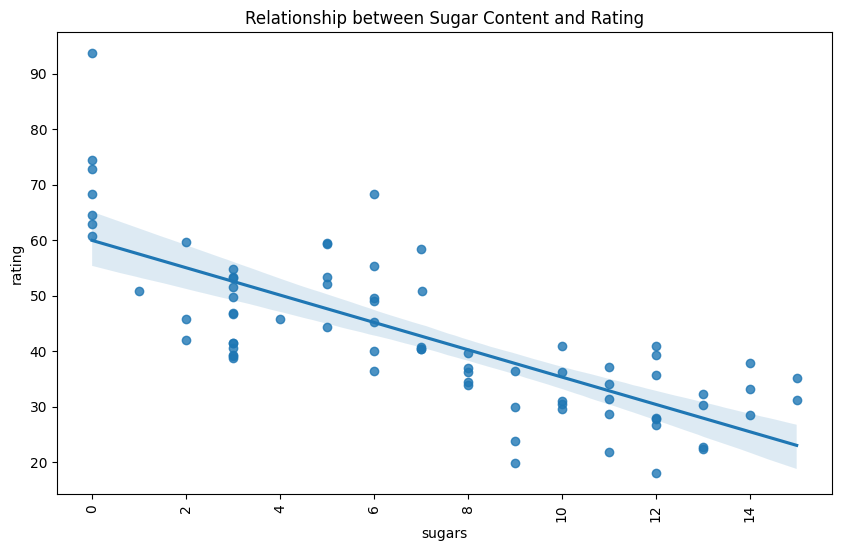

In [45]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=df, x=df['sugars'], y=df['rating'])

<Axes: title={'center': 'Relationship between Sugar Content and Rating'}, xlabel='fat', ylabel='rating'>

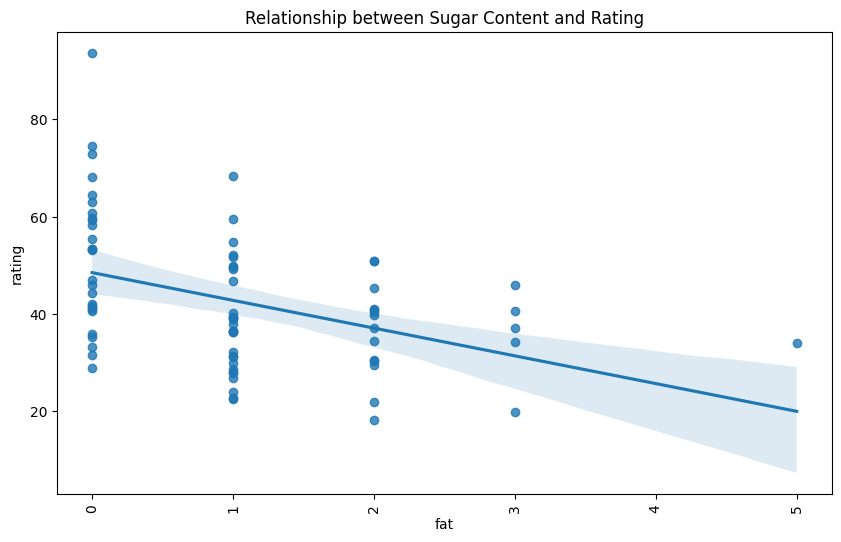

In [46]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=df, x=df['fat'], y=df['rating'])

In [47]:
#Let's drop non numerical features for our X variable 
X = df.drop(columns=['name', 'type', 'rating','shelf', 'cups', 'weight'])
y = df['rating']

#Fit our model
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = model.feature_importances_

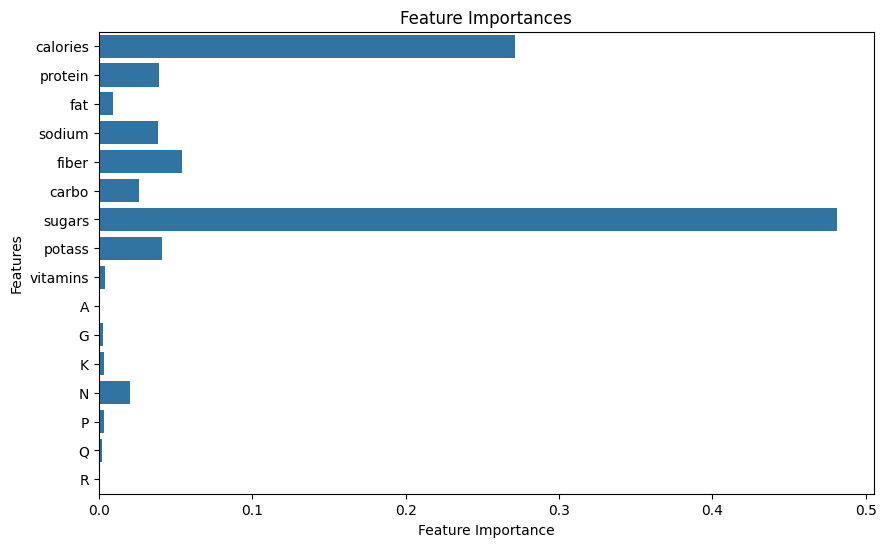

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()